<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Correctness-tests" data-toc-modified-id="Correctness-tests-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Correctness tests</a></span><ul class="toc-item"><li><span><a href="#Uncoupled-quartic-system" data-toc-modified-id="Uncoupled-quartic-system-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Uncoupled quartic system</a></span></li><li><span><a href="#Setting-up-parameters-for-the-model-and-method" data-toc-modified-id="Setting-up-parameters-for-the-model-and-method-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setting up parameters for the model and method</a></span></li><li><span><a href="#Loading-initial-condition-data-obtained-using-the-numerical-methods" data-toc-modified-id="Loading-initial-condition-data-obtained-using-the-numerical-methods-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading initial condition data obtained using the numerical methods</a></span></li><li><span><a href="#Integrate-the-Hamilton's-equations-with-the-initial-conditions-for-the-full-period" data-toc-modified-id="Integrate-the-Hamilton's-equations-with-the-initial-conditions-for-the-full-period-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Integrate the Hamilton's equations with the initial conditions for the full period</a></span></li><li><span><a href="#Plot-the-unstable-periodic-orbits-and-compare" data-toc-modified-id="Plot-the-unstable-periodic-orbits-and-compare-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plot the unstable periodic orbits and compare</a></span></li></ul></li><li><span><a href="#Comparing-the-3-methods-for-each-model-Hamiltonian" data-toc-modified-id="Comparing-the-3-methods-for-each-model-Hamiltonian-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Comparing the 3 methods for each model Hamiltonian</a></span></li></ul></div>

# Correctness tests

The correctness test for computing unstable periodic orbits using the _UPOsHam_ package is done by asserting the analytical solution and numerical solution for the integrable system: uncoupled quartic Hamiltonian. 


Consider the following two degrees of freedom Hamiltonian model where $x, y$ are configuration space coordinates and $p_x,p_y$ are corresponding momenta, $V(x,y)$ is the potential energy, and $T(x,y)$ is the kinetic energy.


## Uncoupled quartic system

The Hamiltonian is

\begin{align}
\mathcal{H}(x,y,p_x,p_y) = & \frac{p_x^2}{2} - \alpha \frac{x^2}{2} + \beta \frac{x^4}{4} + \frac{\omega}{2}\left( p_y^2 + y^2 \right) \\
= & \underbrace{\frac{p_x^2}{2} + \frac{\omega}{2} p_y^2}_{\text{kinetic energy}} + \underbrace{\left( - \alpha \frac{x^2}{2} + \beta \frac{x^4}{4} + \frac{\omega}{2} y^2 \right) }_{\text{potential energy}}
\end{align}

which gives the vector field 

\begin{equation}
\begin{aligned}
\dot{x} = & \frac{\partial \mathcal{H}}{\partial p_x} = p_x \\ 
\dot{y} = & \frac{\partial \mathcal{H}}{\partial p_y} = \omega p_y  \\ 
\dot{p_x} = & -\frac{\partial \mathcal{H}}{\partial x} = \alpha x - \beta x^3 \\ 
\dot{p_y} = & -\frac{\partial \mathcal{H}}{\partial y} = - \omega y \\ 
\end{aligned}
\end{equation}\label{eqn:ham_eqns_uncoupled}

The equilibrium points are located at $(0,0,0,0)$ and $(\pm \sqrt{\alpha/\beta},0,0,0)$. 

The linearized stability of these equilibria gives $(0,0,0,0)$ is a index-1 saddle and $(\pm \sqrt{\alpha/\beta},0,0,0)$ are center equilibria.

Lyapunov subcenter theorem gives the existence of the unstable periodic orbits at energies above the energy of the index-1 saddle equilibrium point. These unstable periodic orbits are the solutions of the Hamiltonian vector field in the $(y,p_y)$ coordinates. These give the linear differential equation with constant coefficient $\omega^2$

\begin{equation}
\ddot{y} = - \omega^2 y
\end{equation}

which has the general solution

\begin{align}
y  & = C_1 e^{i \omega t} + C_2 e^{- i \omega t} \\
p_y & = i C_1 e^{i \omega t} - i C_2 e^{- i \omega t}
\end{align}


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
from matplotlib import cm
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

import sys
sys.path.insert(0, '../src/')
import differential_correction as diffcorr
sys.path.insert(0, '../examples/')
import uncoupled_quartic_hamiltonian as uncoupled


## Setting up parameters for the model and method

In [3]:


N = 4        # dimension of phase space
OMEGA = 1     # uncoupled
EPSILON_S = 0.0 #Energy of the saddle
ALPHA = 1.00
BETA = 1.00
parameters = np.array([1, OMEGA, EPSILON_S, ALPHA, BETA, OMEGA])
eqNum = 1  

# Specify the total energy for the unstable periodic orbit
eSaddle = 0.0 # energy of the saddle
total_energy = 0.10
deltaE = total_energy - eSaddle 

eqPt = diffcorr.get_eq_pts(eqNum, uncoupled.init_guess_eqpt_uncoupled, \
                           uncoupled.grad_pot_uncoupled, parameters)

#energy of the saddle eq pt
eSaddle = diffcorr.get_total_energy([eqPt[0], eqPt[1],0,0], \
                                    uncoupled.pot_energy_uncoupled, \
                                    parameters)

print('Equilibrium point: (x,y) = ' + str(eqPt))
print('Total energy of the equilibrium point: ' + str(eSaddle))


Equilibrium point: (x,y) = [0. 0.]
Total energy of the equilibrium point: 0.0


## Loading initial condition data obtained using the numerical methods

In [10]:



data_path = "../data/"


po_fam_file = "x0_tpcd_deltaE%s_uncoupled.dat" %(deltaE)
print('Loading the periodic orbit family from data file',po_fam_file,'\n') 
x0podata = np.loadtxt(data_path + po_fam_file)
x0po_1_tpcd = x0podata


po_fam_file = "x0_turningpoint_deltaE%s_uncoupled.dat" %(deltaE)
print('Loading the periodic orbit family from data file',po_fam_file,'\n') 
x0podata = np.loadtxt(data_path + po_fam_file)
x0po_1_turningpoint = x0podata


po_fam_file = "x0_diffcorr_deltaE%s_uncoupled.dat" %(deltaE)
print('Loading the periodic orbit family from data file',po_fam_file,'\n') 
x0podata = np.loadtxt(data_path + po_fam_file)
x0po_1_diffcorr = x0podata[0:4]


def upo_analytical(total_energy, omega, t):
    
    q_t = -np.sqrt(total_energy/2)*( np.exp(1j*omega*t) \
                                     + np.exp(-1j*omega*t))
    
    p_t = -1j*np.sqrt(total_energy/2)*( np.exp(1j*omega*t) \
                                     - np.exp(-1j*omega*t))
    
    return np.array([q_t,p_t])


x0po_1_analytic = [0, -np.sqrt(2*(total_energy)),0,0]


Loading the periodic orbit family from data file x0_tpcd_deltaE0.1_uncoupled.dat 

Loading the periodic orbit family from data file x0_turningpoint_deltaE0.1_uncoupled.dat 

Loading the periodic orbit family from data file x0_diffcorr_deltaE0.1_uncoupled.dat 



## Integrate the Hamilton's equations with the initial conditions for the full period 

In [22]:

TSPAN = [0,30]
plt.close('all')
axis_fs = 20
RelTol = 3.e-10
AbsTol = 1.e-10


f = lambda t,x: uncoupled.ham2dof_uncoupled(t,x,parameters)
soln = solve_ivp(f, TSPAN, x0po_1_tpcd[-1,0:4],method='RK45',dense_output=True, \
                 events = lambda t,x : uncoupled.half_period_uncoupled(t,x,parameters), \
                 rtol=RelTol, atol=AbsTol)

te = soln.t_events[0]
tt = [0,te[2]]
t,x,phi_t1,PHI = diffcorr.state_transit_matrix(tt, x0po_1_tpcd[-1,0:4], parameters, \
                                               uncoupled.variational_eqns_uncoupled)



f = lambda t,x: uncoupled.ham2dof_uncoupled(t,x,parameters)
soln = solve_ivp(f, TSPAN, x0po_1_diffcorr, method='RK45', dense_output=True, \
                 events = lambda t,x : uncoupled.half_period_uncoupled(t,x,parameters), \
                 rtol=RelTol, atol=AbsTol)


te = soln.t_events[0]
tt = [0,te[2]]
t,x,phi_t1,PHI = diffcorr.state_transit_matrix(tt, x0po_1_diffcorr, parameters, 
                                               uncoupled.variational_eqns_uncoupled)


f = lambda t,x: uncoupled.ham2dof_uncoupled(t,x,parameters)
soln = solve_ivp(f, TSPAN, x0po_1_turningpoint[-1,0:4], method='RK45', dense_output=True, \
                 events = lambda t,x : uncoupled.half_period_uncoupled(t,x,parameters), \
                 rtol=RelTol, atol=AbsTol)

te = soln.t_events[0]
tt = [0,te[2]]
t,x,phi_t1,PHI = diffcorr.state_transit_matrix(tt, x0po_1_turningpoint[-1,0:4], parameters, 
                                               uncoupled.variational_eqns_uncoupled)



# Numerical solution of the analytical initial condition
f= lambda t,x: uncoupled.ham2dof_uncoupled(t,x,parameters)
soln = solve_ivp(f, TSPAN, x0po_1_analytic, method='RK45', dense_output=True, \
                 events = lambda t,x : uncoupled.half_period_uncoupled(t,x,parameters), \
                 rtol=RelTol, atol=AbsTol)

te = soln.t_events[0]
tt = [0,te[2]]
t,x,phi_t1,PHI = diffcorr.state_transit_matrix(tt, x0po_1_analytic, parameters, 
                                               uncoupled.variational_eqns_uncoupled)


# Discretize the analytical solution at the numerical methods' time points
y, py = upo_analytical(total_energy, OMEGA, t)



## Plot the unstable periodic orbits and compare

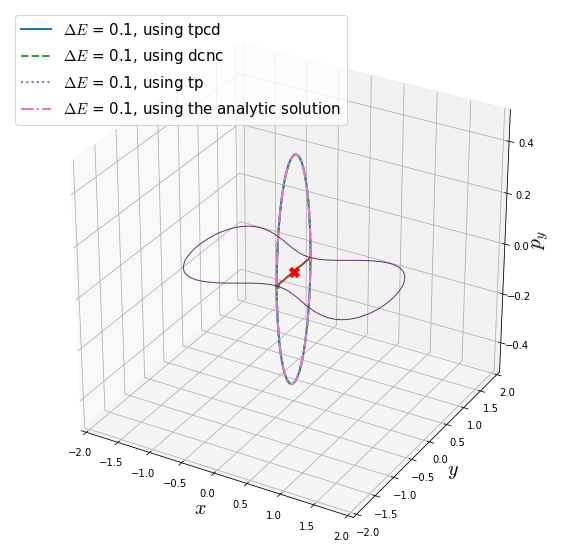

In [23]:

fig = plt.figure(figsize = (10,10))
ax = plt.gca(projection='3d')
ax.plot(x[:,0],x[:,1],x[:,3],'-',lw = 2, \
        label='$\Delta E$ = 0.1, using tpcd')
ax.scatter(x[0,0],x[0,1],x[0,3],s=20,marker='*')
ax.plot(x[:,0], x[:,1], zs=0, zdir='z')


ax.plot(x[:,0],x[:,1],x[:,3],'--',lw = 2, \
        label='$\Delta E$ = 0.1, using dcnc')
ax.scatter(x[0,0],x[0,1],x[0,3],s=20,marker='*')
ax.plot(x[:,0], x[:,1], zs=0, zdir='z')


ax.plot(x[:,0],x[:,1],x[:,3],':',lw = 2, \
        label='$\Delta E$ = 0.1, using tp')
ax.scatter(x[0,0],x[0,1],x[0,3],s=20,marker='*')
ax.plot(x[:,0], x[:,1], zs=0, zdir='z')


# ax.plot(x[:,0],x[:,1],x[:,3],'-.',label='$\Delta E$ = 0.1, using the analytic solution')
# ax.scatter(x[0,0],x[0,1],x[0,3],s=20,marker='*')
# ax.plot(x[:,0], x[:,1], zs=0, zdir='z')

ax.plot(np.zeros((len(t),1)), y, py, '-.', lw = 2, \
        label='$\Delta E$ = 0.1, using the analytic solution')

resX = 100
xVec = np.linspace(-4,4,resX)
yVec = np.linspace(-4,4,resX)
xMat, yMat = np.meshgrid(xVec, yVec)
#cset1 = ax.contour(xMat, yMat, uncoupled_tpcd.get_pot_surf_proj(xVec, yVec,parameters), [0.001,0.1,1,2,4],
#                       linewidths = 1.0, cmap=cm.viridis, alpha = 0.8)
cset2 = ax.contour(xMat, yMat, \
                   diffcorr.get_pot_surf_proj(xVec, yVec, \
                                              uncoupled.pot_energy_uncoupled, \
                                              parameters), \
                   [0.1], zdir='z', offset=0, linewidths = 1.0, cmap=cm.viridis, alpha = 0.8)
ax.scatter(eqPt[0], eqPt[1], s = 100, c = 'r', marker = 'X')
ax.set_xlabel('$x$', fontsize=axis_fs)
ax.set_ylabel('$y$', fontsize=axis_fs)
ax.set_zlabel('$p_y$', fontsize=axis_fs)
legend = ax.legend(loc='upper left', fontsize = axis_fs - 5)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-0.5, 0.5)
plt.grid()
plt.show()

# plt.savefig('comparison_uncoupled.pdf',format='pdf',bbox_inches='tight')


# Comparing the 3 methods for each model Hamiltonian

Plots the unstable periodic orbits obtained using the 3 methods

Loading the periodic orbit family from data file x0_tpcd_deltaE0.1_coupled.dat 

Loading the periodic orbit family from data file x0_turningpoint_deltaE0.1_coupled.dat 

Loading the periodic orbit family from data file x0_diffcorr_deltaE0.1_coupled.dat 



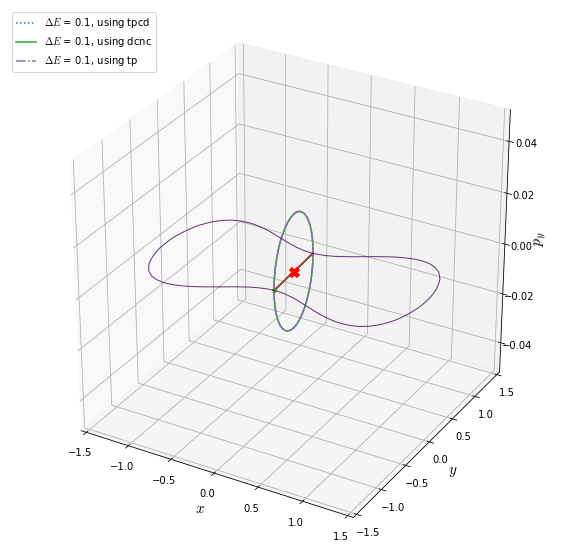

<Figure size 432x288 with 0 Axes>

In [22]:
run compare_methods_coupled.py

Loading the periodic orbit family from data file x0_tpcd_deltaE1.0_deleonberne.dat 

Loading the periodic orbit family from data file x0_turningpoint_deltaE1.0_deleonberne.dat 

Loading the periodic orbit family from data file x0_diffcorr_deltaE1.0_deleonberne.dat 



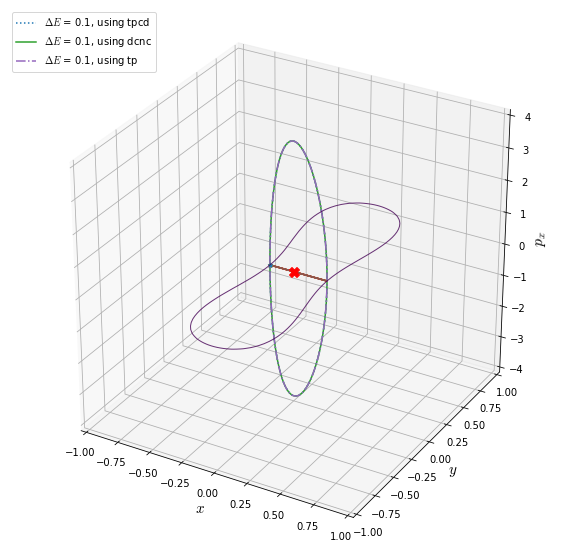

<Figure size 432x288 with 0 Axes>

In [23]:
run compare_methods_deleonberne.py